In [1]:
%matplotlib inline

# TensorFlow Multi-Layer Perceptron

A multi-layer perceptron class for binary and multi-class classification tasks.

> from mlxtend.tf_classifier import TfMultiLayerPerceptron

## Overview

(A more detailed tutorial on multi-layer perceptrons is in preparation.)

![](./TfMultiLayerPerceptron_files/mlp_overview_1.png)

![](./TfMultiLayerPerceptron_files/mlp_overview_2.png)

Please also see the activation function cheatsheet at [`general_concepts.activation-functions`](../general_concepts/activation-functions.md).

### References

- Srivastava, Nitish, et al. [*"Dropout: A simple way to prevent neural networks from overfitting."*](http://dl.acm.org/citation.cfm?id=2670313) The Journal of Machine Learning Research 15.1 (2014): 1929-1958.

## Example 1 - Gradient Descent

Each integer in the `hidden_layers` list argument specifies the number of neurons for the respective layer; via the `activations`, we specify the activation functions for the individual hidden layer. Below, we initialize a multi-layer perceptron with 1 hidden layer using the logistic sigmoid activation. Furthermore, we train the network via simple gradient descent training by setting `optimizer='gradientdescent'` and `minibatches=1`. 

Iteration: 20/20 | Cost 0.55 | Elapsed: 0:00:00 | ETA: 0:00:00

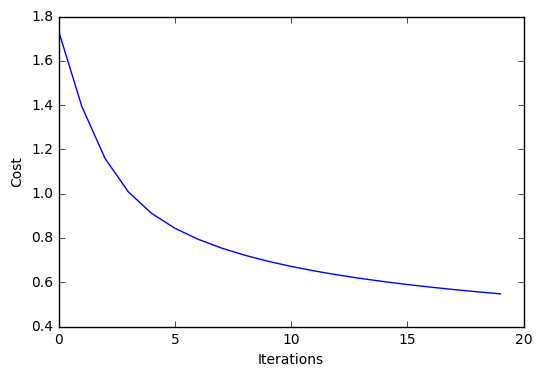

In [2]:
from mlxtend.tf_classifier import TfMultiLayerPerceptron
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Loading Data
X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

mlp = TfMultiLayerPerceptron(eta=0.5, 
                             epochs=20, 
                             hidden_layers=[10],
                             activations=['logistic'],
                             optimizer='gradientdescent',
                             print_progress=3, 
                             minibatches=1, 
                             random_seed=1)

mlp.fit(X, y)

plt.plot(range(len(mlp.cost_)), mlp.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

Continue the training if cost could be further decreased via additional epochs. Instead of training the classifier another 20 epochs, we modify the epochs and set them to 550. Also, we want to make sure to set `init_weights` to `False` in order to re-use the model parameters from the previous training.

Iteration: 550/550 | Cost 0.12 | Elapsed: 0:00:01 | ETA: 0:00:00

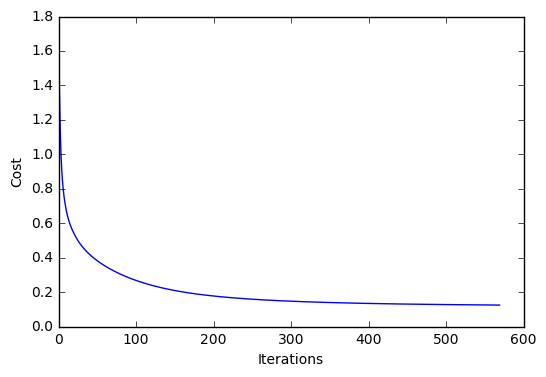

In [3]:
mlp.epochs = 550
mlp.fit(X, y, init_params=False)
plt.plot(range(len(mlp.cost_)), mlp.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

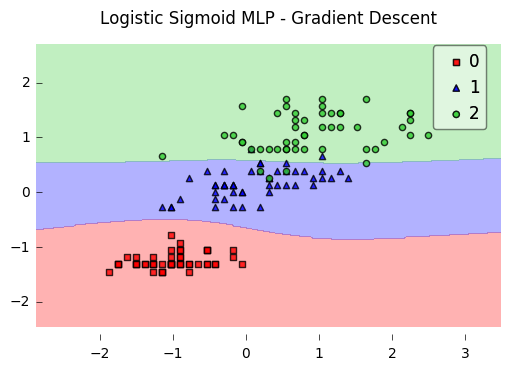

In [4]:
plot_decision_regions(X=X, y=y, clf=mlp)
plt.title('Logistic Sigmoid MLP - Gradient Descent')
plt.show()

#### Predicting Class Labels

In [5]:
print('Predicted class labels:', mlp.predict(X[[0, 99, 149]]))

Predicted class labels: [0 1 2]


#### Predicting Class Probabilities

In [6]:
print('Predicted class probabilities:\n', mlp.predict_proba(X[[0, 99, 149]]))

Predicted class probabilities:
 [[  9.92696404e-01   7.30253896e-03   1.04788933e-06]
 [  1.58569030e-03   9.77745533e-01   2.06688400e-02]
 [  5.52368192e-06   1.68280497e-01   8.31713974e-01]]


## Example 2 - Stochastic Gradient Descent

Stochastic gradient descent training sample by sample can be achieved by setting the number of minibatches equal to the number of samples in the training dataset; everything between `minibatches=1` and `minibatches=len(y)` is "minibatch" stochastic gradient descent. Below, we train a network using 10 minibatches.

Iteration: 100/100 | Cost 0.13 | Elapsed: 0:00:01 | ETA: 0:00:00

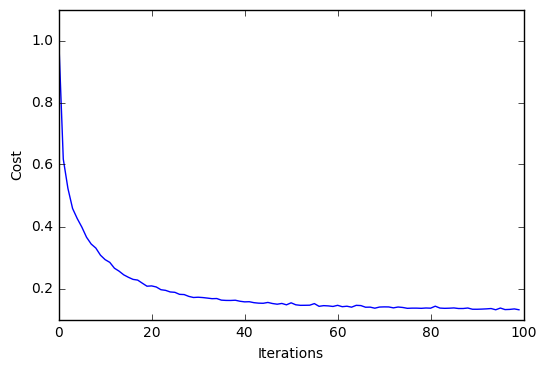

/Users/Sebastian/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:31: DeprecationWarning: Note that importing this function from mlxtend.evaluate has been deprecated and will not longer be supported in mlxtend 0.6. Please use`from mlxtend.plotting import plot_decision_regions` instead.


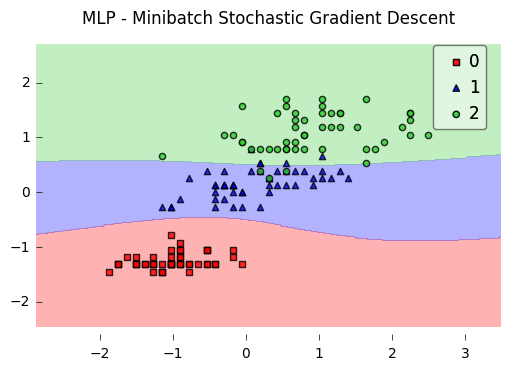

In [7]:
from mlxtend.data import iris_data
from mlxtend.evaluate import plot_decision_regions
from mlxtend.tf_classifier import TfMultiLayerPerceptron
import matplotlib.pyplot as plt

# Loading Data

X, y = iris_data()
X = X[:, [0, 3]] # sepal length and petal width

# standardize
X[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

mlp = TfMultiLayerPerceptron(eta=0.5, 
                             epochs=100, 
                             hidden_layers=[10],
                             activations=['logistic'],
                             print_progress=3, 
                             optimizer='gradientdescent',
                             minibatches=10, 
                             random_seed=1)

mlp.fit(X, y)

plt.plot(range(len(mlp.cost_)), mlp.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plot_decision_regions(X, y, clf=mlp)
plt.title('MLP - Minibatch Stochastic Gradient Descent')
plt.show()

## Example 3 - MNIST

Please note that `mnist_data` just contains a random 5000-sample subset of MNIST (~10% of the original dataset size) suitable for demonstration purposes regarding computational efficiency.

Although it may be overkill, and the network may terribly overfit the training data, let us initialize a more complex neural network with 2 hidden layers and 200 ReLU (Rectifier Linear Units) each.

Iteration: 30/30 | Cost 35.72 | Elapsed: 0:00:08 | ETA: 0:00:00

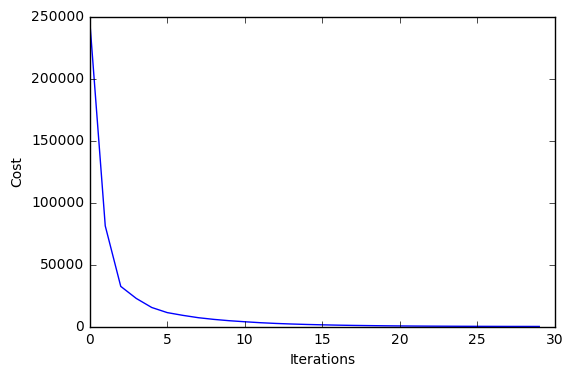

In [8]:
from mlxtend.data import mnist_data
from mlxtend.tf_classifier import TfMultiLayerPerceptron
import matplotlib.pyplot as plt

X, y = mnist_data()

mlp = TfMultiLayerPerceptron(eta=0.01, 
                             epochs=30, 
                             hidden_layers=[200, 200],
                             activations=['relu', 'relu'],
                             print_progress=3, 
                             minibatches=5, 
                             optimizer='adam',
                             random_seed=1)

mlp.fit(X, y)

plt.plot(range(len(mlp.cost_)), mlp.cost_)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [9]:
import numpy as np
y_pred = mlp.predict(X)
print('Training Accuracy: %.2f%%' % (mlp.score(X, y) * 100))

Training Accuracy: 99.78%


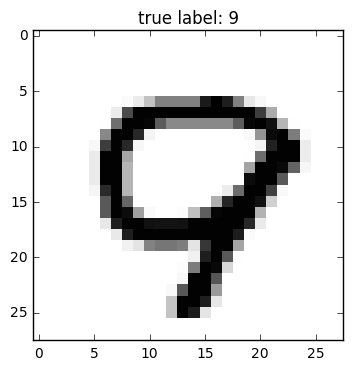

In [10]:
def plot_digit(X, y, idx):
    img = X[idx].reshape(28,28)
    plt.imshow(img, cmap='Greys',  interpolation='nearest')
    plt.title('true label: %d' % y[idx])
    plt.show()
plot_digit(X, y, 4999)  

In [11]:
print('Prediction: %d' % mlp.predict(X[4999, None]))

Prediction: 9


## API

In [12]:
with open('../../api_modules/mlxtend.tf_classifier/TfMultiLayerPerceptron.md', 'r') as f:
    print(f.read())

## TfMultiLayerPerceptron

*TfMultiLayerPerceptron(eta=0.5, epochs=50, hidden_layers=[50, 10], n_classes=None, activations=['logistic', 'logistic'], optimizer='gradientdescent', momentum=0.0, l1=0.0, l2=0.0, dropout=1.0, decay=[0.0, 1.0], minibatches=1, random_seed=None, print_progress=0, dtype=None)*

Multi-layer perceptron classifier.

**Parameters**

- `eta` : float (default: 0.5)

    Learning rate (between 0.0 and 1.0)

- `epochs` : int (default: 50)

    Passes over the training dataset.
    Prior to each epoch, the dataset is shuffled
    if `minibatches > 1` to prevent cycles in stochastic gradient descent.

- `hidden_layers` : list (default: [50, 10])

    Number of units per hidden layer. By default 50 units in the
    first hidden layer, and 10 hidden units in the second hidden layer.

- `n_classes` : int (default: None)

    A positive integer to declare the number of class labels
    if not all class labels are present in a partial training set.
    Gets the number of clas